In [215]:
import json
import pandas as pd
import time
from datetime import datetime

## Load raw data

In [196]:
# read file
with open('./data/fetched_stories.json', 'r') as f:
    stories = json.load(f)

In [197]:
stories[list(stories.keys())[-1:][0]]

{'by': 'paulpauper',
 'descendants': 0,
 'id': 21616596,
 'score': 2,
 'time': 1574543644,
 'title': 'Polarizing F.I.R.E. movement sparks debate among financial professionals',
 'type': 'story',
 'url': 'https://www.theglobeandmail.com/investing/globe-advisor/advisor-news/article-polarizing-fire-movement-sparks-debate-among-financial/'}

## Prepare data

In [484]:
# create DataFrame from raw JSON
stories_df = pd.DataFrame(stories.values())

In [485]:
# sort data by ID
stories_df.sort_values(by="id", inplace=True)

In [486]:
# check order
stories_df.id.is_monotonic, stories_df.time.is_monotonic

(True, True)

In [487]:
stories_df.tail()

,by,descendants,id,score,time,title,type,url,kids,text
72001,rwiggum,0,21616569,3,1574543433,A Trump Twitter bot using GPT2 trained on his ...,story,https://twitter.com/gpt2_trump,NaN,NaN
72002,paulpauper,1,21616576,1,1574543488,Why UBI Ought to Appeal to Conservatives,story,https://quillette.com/2019/11/20/why-ubi-ought...,[21617054],NaN
72003,fortran77,0,21616581,1,1574543524,Russia's ‘Sandworm’ Hackers Also Targeted Andr...,story,https://www.wired.com/story/sandworm-android-m...,NaN,NaN
72004,fortran77,0,21616586,3,1574543581,"A YouTuber with 350K Subscribers Was Hacked, T...",story,https://www.forbes.com/sites/paultassi/2019/11...,NaN,NaN
72005,paulpauper,0,21616596,2,1574543644,Polarizing F.I.R.E. movement sparks debate amo...,story,https://www.theglobeandmail.com/investing/glob...,NaN,NaN


## Make timeseries data set

In [512]:
data = stories_df[['score', 'id']].copy(deep=True)

In [513]:
times = pd.to_datetime(stories_df.time, unit='s')

In [514]:
data.index = times
data.index[0]

Timestamp('2019-08-29 19:02:49')

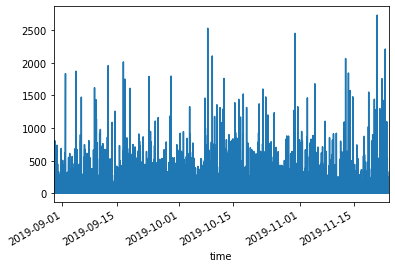

In [515]:
data['score'].plot()

In [516]:
len(data)

72006

In [627]:
# data['2019-08-31':'2019-08-31']
data

,score,id
time,,
2019-08-29 19:02:49,3,20832555
2019-08-29 19:05:04,464,20832570
2019-08-29 19:05:55,1,20832573
2019-08-29 19:06:10,1,20832577
2019-08-29 19:08:49,3,20832593
...,...,...
2019-11-23 21:10:33,3,21616569
2019-11-23 21:11:28,1,21616576
2019-11-23 21:12:04,1,21616581


### Collect duplicates

In [599]:
duplicates = stories_df[stories_df.duplicated('time', keep=False)==True][['score', 'id', 'time']]
duplicates.index = pd.to_datetime(duplicates.time, unit='s')
# duplicates.drop(columns='time', inplace=True)
del duplicates.index.name

In [609]:
duplicates

,score,id,time
2019-08-30 12:39:13,45,20837923,1567168753
2019-08-30 12:39:13,2,20837924,1567168753
2019-08-30 17:51:05,2,20840834,1567187465
2019-08-30 17:51:05,2,20840835,1567187465
2019-08-30 18:52:58,53,20841455,1567191178
...,...,...,...
2019-11-22 20:00:55,5,21609449,1574452855
2019-11-23 13:53:44,4,21614097,1574517224
2019-11-23 13:53:44,2,21614098,1574517224
2019-11-23 14:02:38,1,21614140,1574517758


In [624]:
g = duplicates.groupby(by=['time'], as_index=False)

In [625]:
g.count()

,time,score,id
0,1567168753,2,2
1,1567187465,2,2
2,1567191178,2,2
3,1567298991,2,2
4,1567346871,2,2
...,...,...,...
430,1574441872,2,2
431,1574449888,2,2
432,1574452855,2,2
433,1574517224,2,2


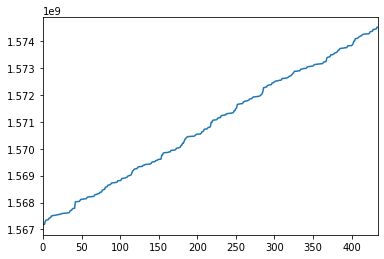

In [626]:
g.count().time.plot()
# сгруппировать по времени дня

In [628]:
datetime.fromtimestamp(1567522889)

datetime.datetime(2019, 9, 3, 18, 1, 29)

In [630]:
stories_df[stories_df['score']>3]

,by,descendants,id,score,time,title,type,url,kids,text
12745,mikl,509,20832570,464,1567105504,Software made me loathe my car,story,https://mikkel.hoegh.org/2019/08/29/how-softwa...,"[20833055, 20833161, 20833425, 20833181, 20835...",NaN
12755,protomyth,3,20832688,73,1567106341,Microwatt: A Tiny Open Power ISA Softcore Writ...,story,https://github.com/antonblanchard/microwatt,"[20852178, 20855559, 20855339]",NaN
12758,headalgorithm,0,20832702,4,1567106434,Ways for Engineers to Leverage Their Social Me...,story,https://spectrum.ieee.org/at-work/tech-careers...,NaN,NaN
12759,sooham,5,20832705,76,1567106467,"“That is either genius, or a seriously disease...",story,https://lkml.org/lkml/2018/3/20/845,"[20836936, 20838793, 20842116, 20851350, 20837...",NaN
12762,headalgorithm,0,20832730,4,1567106634,How Amazon and Silicon Valley Seduced the Pent...,story,https://www.propublica.org/article/how-amazon-...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
71985,praveenscience,62,21616381,141,1574541539,Have scientists discovered a fifth force of na...,story,https://www.telegraph.co.uk/news/2019/11/23/ha...,"[21616530, 21617237, 21616507, 21616531, 21616...",NaN
71986,JumpCrisscross,0,21616387,5,1574541592,Would-Be Chinese Defector Details Covert Campa...,story,https://www.nytimes.com/2019/11/22/world/asia/...,NaN,NaN
71992,firstbase,160,21616463,121,1574542377,What I have learned from my suicidal patients,story,https://www.theguardian.com/lifeandstyle/2019/...,"[21617086, 21617002, 21617339, 21617536, 21622...",NaN
71994,allovernow,10,21616469,23,1574542398,The Yellow Fleet (2018),story,https://www.amusingplanet.com/2018/09/how-war-...,"[21623834, 21624172, 21622521, 21623778]",NaN
